<a href="https://colab.research.google.com/github/wcjdesingweb/challenge/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [3]:
# Agrupamos las tiendas y sus nombres
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Análisis de facturación
facturacion = []

for nombre, tienda_df in zip(nombres, tiendas):
    total = tienda_df["Precio"].sum()
    facturacion.append((nombre, total))

# Ordenamos de mayor a menor por facturación
facturacion_ordenada = sorted(facturacion, key=lambda x: x[1], reverse=True)

# Mostramos facturación ordenada
print(" Facturación total por tienda (ordenada de mayor a menor):\n")
for nombre, total in facturacion_ordenada:
    print(f"{nombre}: ${total:,.2f}")

# Identificar máxima facturación
max_valor = facturacion_ordenada[0][1]
tiendas_mas_venden = [nombre for nombre, total in facturacion_ordenada if total == max_valor]

# Identificar mínima facturación
min_valor = facturacion_ordenada[-1][1]
tiendas_menos_venden = [nombre for nombre, total in facturacion_ordenada if total == min_valor]

# Mayor facturación
if len(tiendas_mas_venden) == 1:
    print(f" La tienda que MÁS vende es: {tiendas_mas_venden[0]} con ${max_valor:,.2f}")
else:
    print(f"Las tiendas que MÁS venden (empate) son: {', '.join(tiendas_mas_venden)} con ${max_valor:,.2f} cada una")

# Menor facturación
if len(tiendas_menos_venden) == 1:
    print(f" La tienda que MENOS vende es: {tiendas_menos_venden[0]} con ${min_valor:,.2f}")
else:
    print(f" Las tiendas que MENOS venden (empate) son: {', '.join(tiendas_menos_venden)} con ${min_valor:,.2f} cada una")


 Facturación total por tienda (ordenada de mayor a menor):

Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00
 La tienda que MÁS vende es: Tienda 1 con $1,150,880,400.00
 La tienda que MENOS vende es: Tienda 4 con $1,038,375,700.00


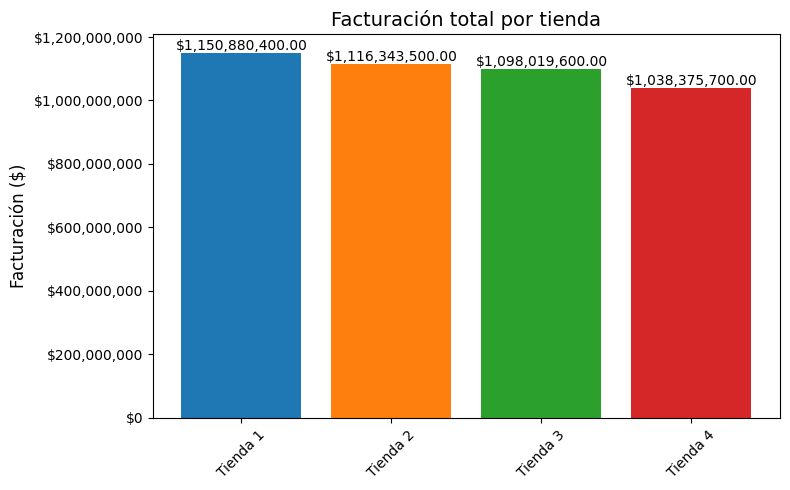

In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Extraemos nombres y valores ya ordenados
tiendas_nombres = [nombre for nombre, _ in facturacion_ordenada]
facturacion_valores = [total for _, total in facturacion_ordenada]

# Colores distintos por tienda
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # azul, naranja, verde, rojo

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
barras = plt.bar(tiendas_nombres, facturacion_valores, color=colores)

# Títulos y etiquetas
plt.title("Facturación total por tienda", fontsize=14)
plt.ylabel("Facturación ($)", fontsize=12)
plt.xticks(rotation=45)

# Formatear valores en las etiquetas con formato moneda
for barra, valor in zip(barras, facturacion_valores):
    plt.text(barra.get_x() + barra.get_width()/2,
             barra.get_height(),
             f"${valor:,.2f}",
             ha='center',
             va='bottom',
             fontsize=10)

# Formateo del eje Y como moneda
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [ ]:
# Análisis de categorías más populares por tienda
print("\nCategorías más populares por tienda:\n")

for nombre, tienda_df in zip(nombres, tiendas):
    # Agrupamos por categoría y sumamos la cantidad
    categorias = tienda_df.groupby("Categoría del Producto")["Cantidad de cuotas"].sum().reset_index()

    # Ordenamos de mayor a menor
    categorias = categorias.sort_values(by="Cantidad de cuotas", ascending=False)

    # Mostramos el top 3 de categorías
    print(f"\n{nombre}:")
    print(categorias.head(3))



Categorías más populares por tienda:


Tienda 1:
  Categoría del Producto  Cantidad de cuotas
7                Muebles                1446
3           Electrónicos                1341
2      Electrodomésticos                 906

Tienda 2:
  Categoría del Producto  Cantidad de cuotas
3           Electrónicos                1333
7                Muebles                1265
2      Electrodomésticos                 890

Tienda 3:
  Categoría del Producto  Cantidad de cuotas
7                Muebles                1408
3           Electrónicos                1262
5               Juguetes                 937

Tienda 4:
  Categoría del Producto  Cantidad de cuotas
7                Muebles                1392
3           Electrónicos                1293
5               Juguetes                 921


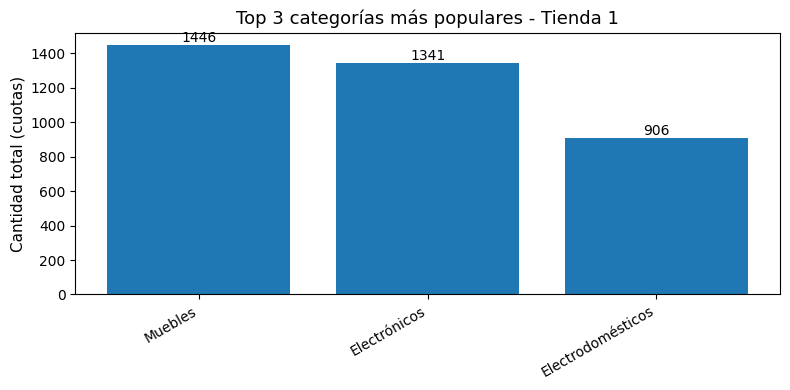

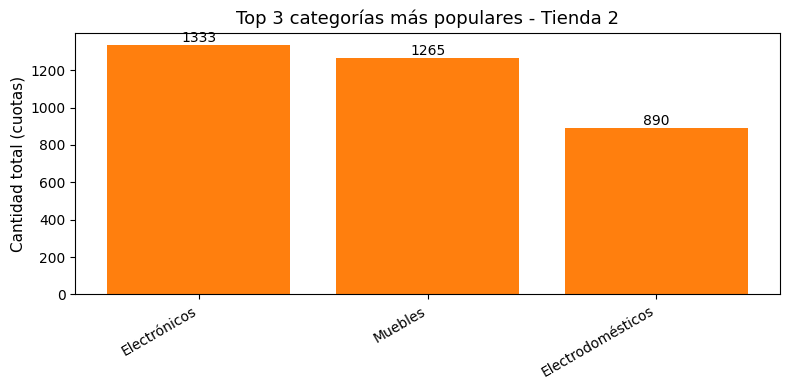

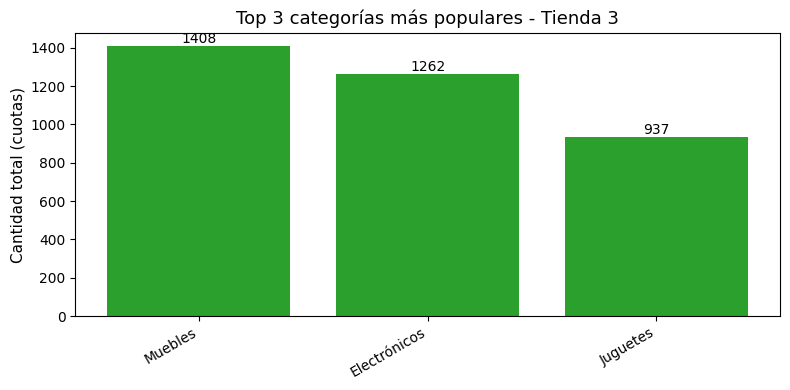

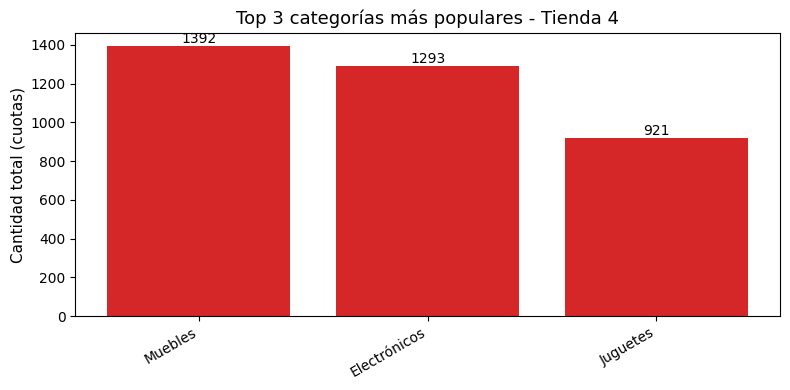

In [ ]:
import matplotlib.pyplot as plt

# Crear un gráfico individual por cada tienda
for nombre, tienda_df, color in zip(nombres, tiendas, colores):
    # Agrupar por categoría y sumar la cantidad
    categorias = tienda_df.groupby("Categoría del Producto")["Cantidad de cuotas"].sum().reset_index()

    # Ordenar de mayor a menor
    categorias = categorias.sort_values(by="Cantidad de cuotas", ascending=False).head(3)

    # Gráfico de barras
    plt.figure(figsize=(8, 4))
    barras = plt.bar(categorias["Categoría del Producto"], categorias["Cantidad de cuotas"], color=color)

    # Títulos y etiquetas
    plt.title(f"Top 3 categorías más populares - {nombre}", fontsize=13)
    plt.ylabel("Cantidad total (cuotas)", fontsize=11)
    plt.xticks(rotation=30, ha='right')

    # Mostrar etiquetas con valor encima de las barras
    for barra in barras:
        plt.text(barra.get_x() + barra.get_width()/2,
                 barra.get_height(),
                 int(barra.get_height()),
                 ha='center',
                 va='bottom',
                 fontsize=10)

    plt.tight_layout()
    plt.show()


# 3. Calificación promedio de la tienda


In [ ]:
# Calificación promedio por tienda
print("\nCalificación promedio por tienda:")

for nombre, tienda_df in zip(nombres, tiendas):
    calificacion_promedio = tienda_df["Calificación"].mean()
    print(f"{nombre}: {calificacion_promedio:.2f}")



Calificación promedio por tienda:
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


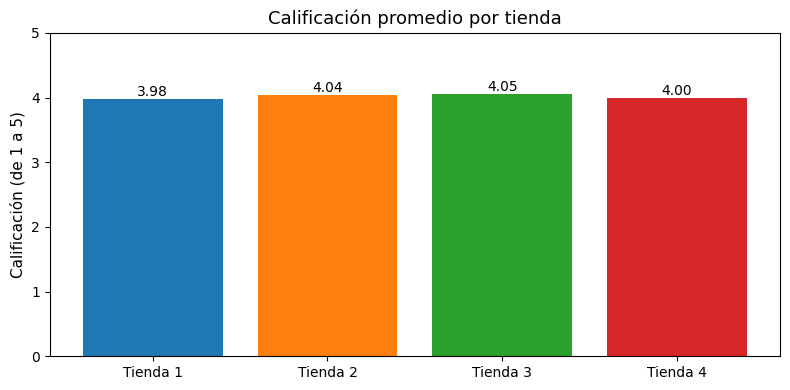

In [ ]:
import matplotlib.pyplot as plt

# Calificaciones promedio
calificaciones = [tienda_df["Calificación"].mean() for tienda_df in tiendas]

# Crear gráfico de barras
plt.figure(figsize=(8, 4))
barras = plt.bar(nombres, calificaciones, color=colores)

# Título y etiquetas
plt.title("Calificación promedio por tienda", fontsize=13)
plt.ylabel("Calificación (de 1 a 5)", fontsize=11)
plt.ylim(0, 5)

# Etiquetas con valores
for barra, cal in zip(barras, calificaciones):
    plt.text(barra.get_x() + barra.get_width()/2,
             barra.get_height(),
             f"{cal:.2f}",
             ha='center',
             va='bottom',
             fontsize=10)

plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

In [ ]:
print("\n Productos más y menos vendidos por tienda (basado en cantidad de ventas)")
for nombre, tienda_df in zip(nombres, tiendas):
    # Contar las ventas por producto
    productos = tienda_df["Producto"].value_counts().reset_index()
    productos.columns = ["Producto", "Cantidad Vendida"]

    print(f"\n{nombre}:")
    print("Top 3 productos más vendidos:")
    print(productos.head(3).to_string(index=False))

    print("\nTop 3 productos menos vendidos:")
    print(productos.tail(3).to_string(index=False))



 Productos más y menos vendidos por tienda (basado en cantidad de ventas)

Tienda 1:
Top 3 productos más vendidos:
     Producto  Cantidad Vendida
   Microondas                60
TV LED UHD 4K                60
      Armario                60

Top 3 productos menos vendidos:
                 Producto  Cantidad Vendida
          Olla de presión                35
Auriculares con micrófono                33
             Celular ABXY                33

Tienda 2:
Top 3 productos más vendidos:
                 Producto  Cantidad Vendida
Iniciando en programación                65
               Microondas                62
                  Batería                61

Top 3 productos menos vendidos:
       Producto  Cantidad Vendida
Mesa de comedor                34
      Impresora                34
  Juego de mesa                32

Tienda 3:
Top 3 productos más vendidos:
       Producto  Cantidad Vendida
  Kit de bancas                57
Mesa de comedor                56
      Cama king   

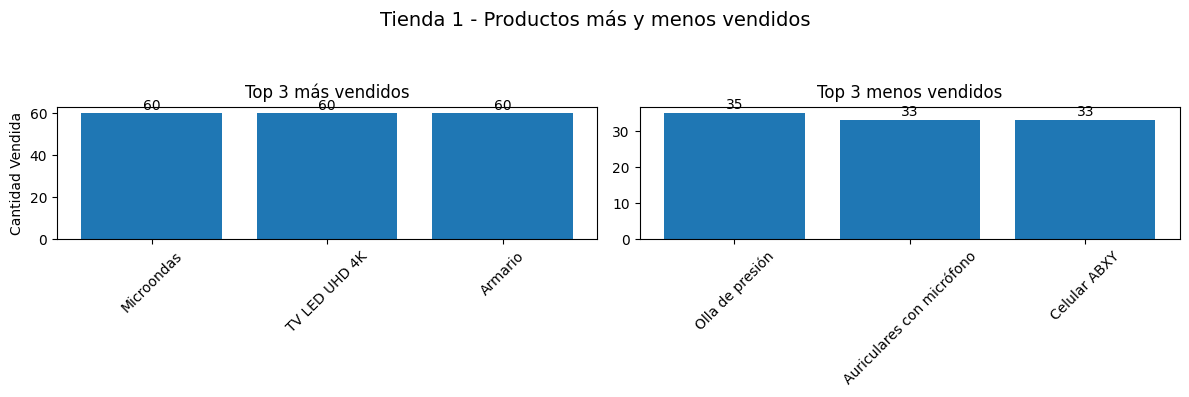

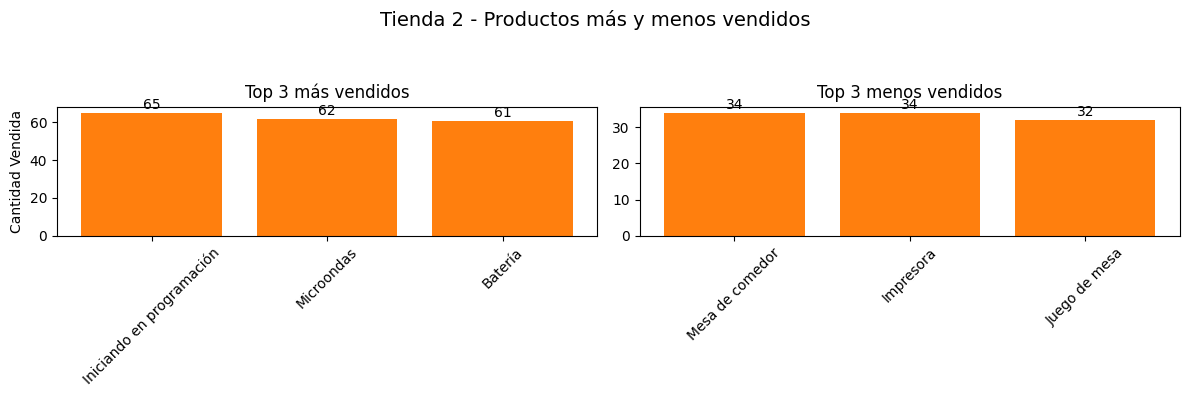

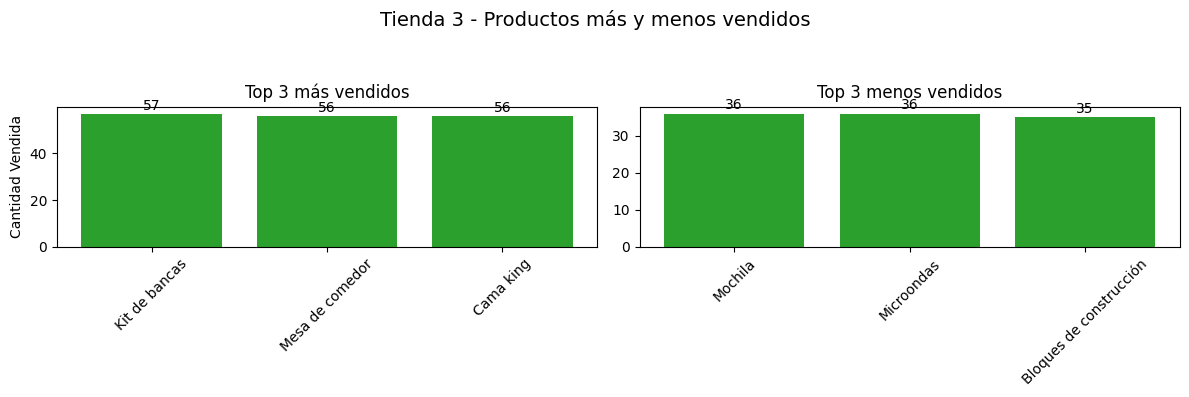

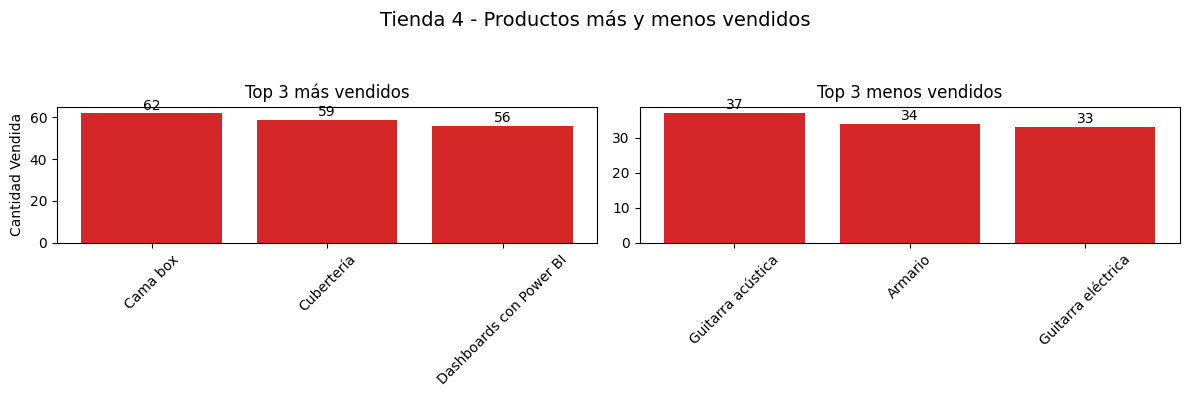

In [5]:
import matplotlib.pyplot as plt

for nombre, tienda_df, color in zip(nombres, tiendas, colores):
    # Contar ventas por producto
    productos = tienda_df["Producto"].value_counts().reset_index()
    productos.columns = ["Producto", "Cantidad Vendida"]

    # Seleccionar top 3 y bottom 3
    top_3 = productos.head(3)
    bottom_3 = productos.tail(3)

    # Crear figura
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(f"{nombre} - Productos más y menos vendidos", fontsize=14)

    # Top 3
    axes[0].bar(top_3["Producto"], top_3["Cantidad Vendida"], color=color)
    axes[0].set_title("Top 3 más vendidos")
    axes[0].set_ylabel("Cantidad Vendida")
    axes[0].tick_params(axis='x', rotation=45)

    for i, v in enumerate(top_3["Cantidad Vendida"]):
        axes[0].text(i, v + 0.3, str(v), ha='center', va='bottom')

    # Bottom 3
    axes[1].bar(bottom_3["Producto"], bottom_3["Cantidad Vendida"], color=color)
    axes[1].set_title("Top 3 menos vendidos")
    axes[1].tick_params(axis='x', rotation=45)

    for i, v in enumerate(bottom_3["Cantidad Vendida"]):
        axes[1].text(i, v + 0.3, str(v), ha='center', va='bottom')

    plt.tight_layout(rect=[0, 0, 1, 0.92])
    plt.show()


# 5. Envío promedio por tienda

In [ ]:
print("\n=== Envío promedio por tienda ===")

for nombre, tienda_df in zip(nombres, tiendas):
    envio_promedio = tienda_df["Costo de envío"].mean()
    print(f"{nombre}: ${envio_promedio:,.2f}")



=== Envío promedio por tienda ===
Tienda 1: $26,018.61
Tienda 2: $25,216.24
Tienda 3: $24,805.68
Tienda 4: $23,459.46


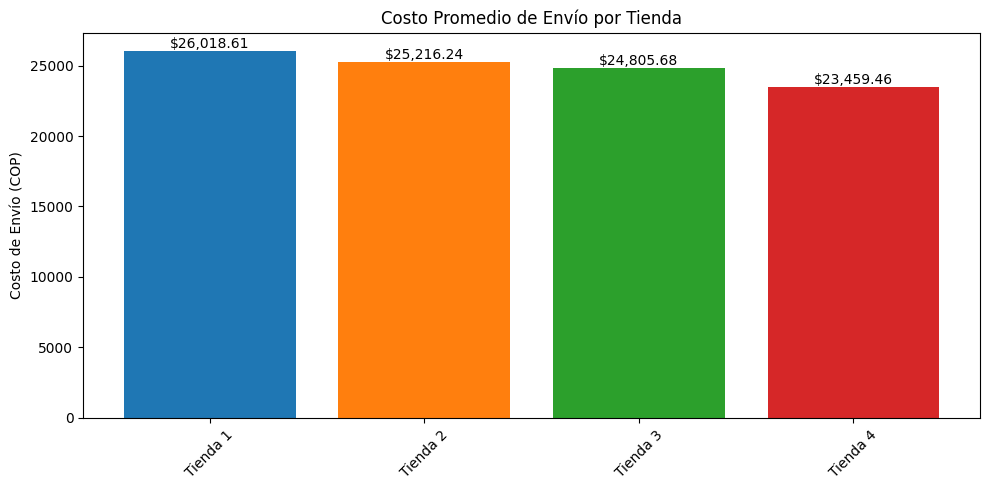

In [6]:
# Calcular el costo promedio de envío por tienda
envios_promedio = []

for nombre, tienda_df in zip(nombres, tiendas):
    costo_promedio = tienda_df["Costo de envío"].mean()
    envios_promedio.append((nombre, costo_promedio))

# Extraer nombres y valores
nombres_tiendas = [nombre for nombre, _ in envios_promedio]
valores_promedio = [valor for _, valor in envios_promedio]

# Gráfico de barras
plt.figure(figsize=(10, 5))
barras = plt.bar(nombres_tiendas, valores_promedio, color=colores)

# Etiquetas y título
plt.title("Costo Promedio de Envío por Tienda")
plt.ylabel("Costo de Envío (COP)")
plt.xticks(rotation=45)

# Agregar etiquetas con formato de moneda
for barra, valor in zip(barras, valores_promedio):
    plt.text(barra.get_x() + barra.get_width() / 2, valor + 0.1, f"${valor:,.2f}",
             ha='center', va='bottom')

plt.tight_layout()
plt.show()
